### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30 ....., 210} Note: for each N, select your training set by choosing the first └N/3┘ rows of Class 0 and the first N −  └N/3┘ rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196} This plot is called a Learning Curve

In [1]:
import numpy as np

CLASS0 = "class 0"
CLASS1 = "class 1"
EPSILON = 1e-8

def load_data(file_path):
	"""read records from csv file"""
	row_data = np.genfromtxt(file_path, dtype=None, delimiter=',', encoding='utf-8')[1:]
	X = np.array(row_data[:, :-1], dtype=float)
	Y_row_str_data = row_data[:, row_data.shape[1] - 1]
	y = np.array([1 if x == "Abnormal" else 0 for x in Y_row_str_data])
	# print(X)
	# print(y)
	return X, y

def train_test_by_class_index(X, y, split_info_dict):
	"""According to the dict, split row data into X_train, X_test, y_train, y_test"""
	assert X.shape[0] == y.shape[0], \
		"the size of X must be equal to the size of y"
	assert split_info_dict is not None, \
		"Please initialize a dict with {CLASS0: int, CLASS1: int}"
	
	normal_indexes = (y == 0)
	abnormal_indexes = (y == 1)
	normal_limit = split_info_dict[CLASS0]
	abnormal_limit = split_info_dict[CLASS1]

	'''first 70 rows of class 0'''
	X_data_normal = X[normal_indexes, :][:normal_limit]
	y_data_normal = y[normal_indexes][:normal_limit]

	'''the rest of data in class 0'''
	X_rest_data_normal = X[normal_indexes, :][normal_limit:]
	y_rest_data_normal = y[normal_indexes][normal_limit:]

	'''first 140 rows of class 1'''
	X_data_abnormal = X[abnormal_indexes, :][:abnormal_limit]
	y_data_abnormal = y[abnormal_indexes][:abnormal_limit]
	'''the rest of data in class 1'''
	X_rest_data_abnormal = X[abnormal_indexes, :][abnormal_limit:]
	y_rest_data_abnormal = y[abnormal_indexes][abnormal_limit:]

	'''combine them into one array'''
	X_train = np.concatenate((X_data_normal, X_data_abnormal), axis=0)
	X_test = np.concatenate((X_rest_data_normal, X_rest_data_abnormal), axis=0)

	y_train = np.concatenate((y_data_normal, y_data_abnormal), axis=0)
	y_test = np.concatenate((y_rest_data_normal, y_rest_data_abnormal), axis=0)

	return X_train, X_test, y_train, y_test

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

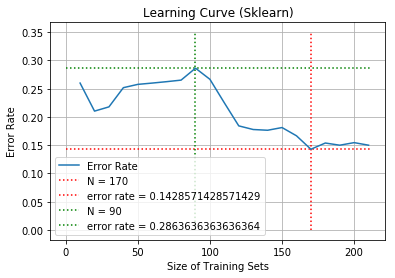

[0.26       0.21034483 0.21785714 0.25185185 0.25769231 0.26
 0.2625     0.26521739 0.28636364 0.26666667 0.225      0.18421053
 0.17777778 0.17647059 0.18125    0.16666667 0.14285714 0.15384615
 0.15       0.15454545 0.15      ]


In [3]:
X_row_data, Y_row_data = load_data('./assets/data.csv')

alternative_N = np.arange(10, 211, 10)
test_accuracy = np.empty(len(alternative_N))
for index, N in enumerate(alternative_N):
    class0_row_num = math.floor(N / 3)
    class1_row_num = N - class0_row_num
    split_info_dict = {CLASS0: class0_row_num, CLASS1: class1_row_num}
    X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, split_info_dict)

    # Standardization
    standardScaler = StandardScaler()
    standardScaler.fit(X_train)
    X_train = standardScaler.transform(X_train)
    X_test = standardScaler.transform(X_test)

    for k in np.arange(1, N, 5):
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        # print("N = {}, k = {}, score = {}".format(N, k, score))

        test_accuracy[index] = score if test_accuracy[index] < score else test_accuracy[index]

test_error_rate = np.array([1 - score for score in test_accuracy])

higest_accuracy_rate = np.max(test_accuracy)
lowest_accuracy_rate = np.min(test_accuracy)
higest_accuracy_N = np.argmax(test_accuracy) * 10 + 10
lowest_accuracy_N = np.argmin(test_accuracy) * 10 + 10

plt.title('Learning Curve (Sklearn)')
plt.plot(alternative_N, test_error_rate, label='Error Rate')
plt.vlines(higest_accuracy_N, 0, 0.35, colors='red', label='N = ' + str(higest_accuracy_N), linestyles='dotted')
plt.hlines(1 - higest_accuracy_rate, 0, 211, colors='red', label='error rate = ' + str(1 - higest_accuracy_rate),
           linestyles='dotted')

plt.vlines(lowest_accuracy_N, 0, 0.35, colors='green', label='N = ' + str(lowest_accuracy_N), linestyles='dotted')
plt.hlines(1 - lowest_accuracy_rate, 0, 211, colors='green', label='error rate = ' + str(1 - lowest_accuracy_rate),
           linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Size of Training Sets')
plt.ylabel('Error Rate')
plt.show()
print(test_error_rate)